In [ ]:
#Import scikit-learn dataset library
import pandas as pd
import math
from sklearn import datasets
import numpy as np
import random as rd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from seaborn import heatmap
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cluster import KMeans  
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import seaborn as sns
from yellowbrick.classifier import ClassificationReport
from openpyxl import Workbook, load_workbook #import to excel
#from yellowbrick.datasets import load_occupancy


#Load dataset
soil_data = pd.read_csv('/content/drive/MyDrive/maindata(csv).csv')

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=98ae04f4b40a6903dfaa2ed778935d30f7ccb93884a958e82309f30bd541ea72
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
soil_data

,Mrittika Dol,Bhumi,Bunot,N,P,K,S,Z,B,Crop
0,Bajowa,mh,2,0.093,2.72,0.97,208.35,0.52,1.15,Rosun
1,Bajowa,mh,2,0.090,2.28,0.96,315.65,1.65,1.01,Rosun
2,Bajowa,mh,2,0.144,2.42,0.82,246.17,1.19,1.05,Rosun
3,Bajowa,mh,2,0.133,2.85,1.08,222.40,0.47,0.95,Rosun
4,Bajowa,mh,2,0.151,5.88,0.82,177.56,0.47,0.95,Rosun
...,...,...,...,...,...,...,...,...,...,...
1036,Barishal,mh,3,0.080,11.50,0.42,31.06,0.84,0.34,Mugg
1037,Barishal,mh,3,0.070,10.46,0.60,33.46,0.62,0.92,Mugg
1038,Barishal,mh,3,0.070,15.99,0.63,25.84,1.35,1.03,Mugg
1039,Barishal,mh,3,0.070,10.98,0.61,26.09,0.82,1.07,Mugg


          Bunot         N         P         K         S         Z         B
Bunot  1.000000  0.029998  0.086986  0.079953  0.038551  0.153618  0.196017
N      0.029998  1.000000 -0.078979 -0.005439 -0.003307  0.076499  0.032077
P      0.086986 -0.078979  1.000000  0.092040 -0.024579  0.000272 -0.098679
K      0.079953 -0.005439  0.092040  1.000000  0.013030  0.019591  0.052376
S      0.038551 -0.003307 -0.024579  0.013030  1.000000  0.009183  0.031007
Z      0.153618  0.076499  0.000272  0.019591  0.009183  1.000000  0.070554
B      0.196017  0.032077 -0.098679  0.052376  0.031007  0.070554  1.000000


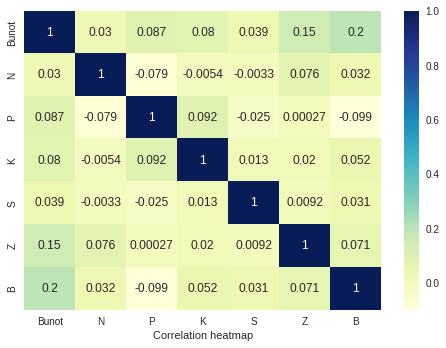

In [ ]:
print(soil_data.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(soil_data.corr(), cmap="YlGnBu", annot=True)
plt.xlabel("Correlation heatmap")

# displaying heatmap
plt.show()



In [ ]:
soil_data.Crop.unique()

array(['Rosun', 'Mugg', 'Kheshari'], dtype=object)

In [ ]:
X=soil_data.iloc[:, 3:9]
Y=soil_data.iloc[:,9]
X_train, X_test, y_train, y_test=train_test_split (X,Y,test_size=0.20,random_state=1)
print(X_test.values)


[[ 0.094  2.4    0.09  19.77   0.47   0.24 ]
 [ 0.153  6.07   0.18  39.4    0.77   0.71 ]
 [ 0.13   1.14   0.15  46.25   0.46   0.77 ]
 ...
 [ 0.12   6.28   0.28  12.59   1.02   0.49 ]
 [ 0.18   0.77   0.35  22.24   0.8    0.88 ]
 [ 0.11  10.4    0.14  16.8    0.5    0.22 ]]


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Random forest
ran_for = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
ran_for.fit(X_train, y_train)
y_pred= ran_for.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 26,   0,   0],
       [  1, 125,   0],
       [  0,   1,  56]])

Text(0.5, 24.0, 'Predicted label')

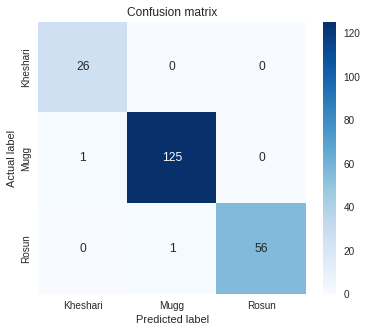

In [ ]:
fig, px=plt.subplots(figsize=(6,5))
heatmap(cnf_matrix , cmap="Blues", xticklabels=['Kheshari','Mugg','Rosun'],yticklabels=['Kheshari','Mugg','Rosun'],annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#random forest

ROC AUC score: 0.9928344931281613


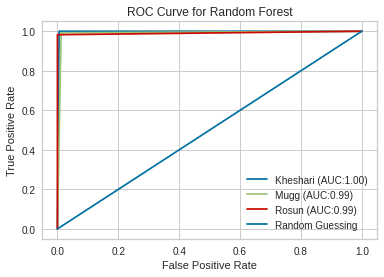

In [ ]:
target= ['Kheshari','Mugg','Rosun']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (6, 4))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
c_ax.set_title('ROC Curve for Random Forest', size=12)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Kheshari       0.96      1.00      0.98        26
        Mugg       0.99      0.99      0.99       126
       Rosun       1.00      0.98      0.99        57

    accuracy                           0.99       209
   macro avg       0.99      0.99      0.99       209
weighted avg       0.99      0.99      0.99       209



Text(0.5, 1.1, 'Random Forest Classification')

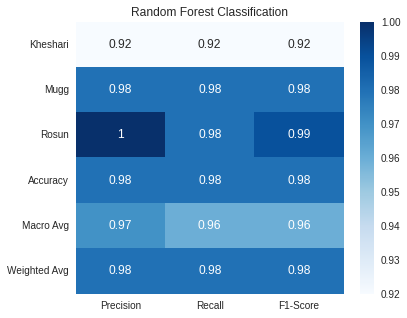

In [ ]:
conmat=[[0.92,0.92,0.92],[0.98,0.98,0.98],[1,0.98,0.99],[0.98,0.98,0.98],[.97,0.96,0.96],[.98,0.98,0.98]]
fig, px=plt.subplots(figsize=(6,5))
heatmap(conmat , cmap="Blues", xticklabels=['Precision','Recall','F1-Score'],yticklabels=['Kheshari','Mugg','Rosun','Accuracy','Macro Avg', 'Weighted Avg'],annot=True,fmt='g')
plt.title('Random Forest Classification', y=1.1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9904306220095693


In [ ]:
#Decision Tree
dec_tree= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dec_tree.fit(X_train, y_train)
y_pred= dec_tree.predict(X_test) 

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 24,   2,   0],
       [  1, 124,   1],
       [  0,   0,  57]])

Text(0.5, 24.0, 'Predicted label')

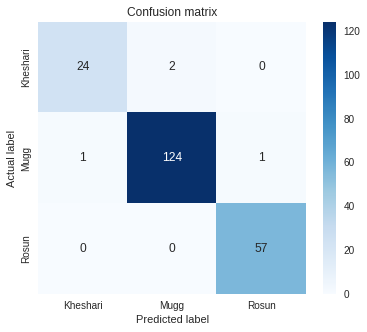

In [ ]:
fig, px=plt.subplots(figsize=(6,5))
heatmap(cnf_matrix , cmap="Blues", xticklabels=['Kheshari','Mugg','Rosun'],yticklabels=['Kheshari','Mugg','Rosun'],annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#decision tree

ROC AUC score: 0.9785106822365002


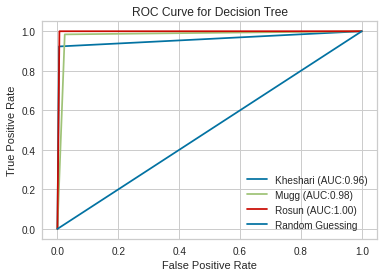

In [ ]:
target= ['Kheshari','Mugg','Rosun']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (6, 4))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
c_ax.set_title('ROC Curve for Decision Tree', size=12)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Kheshari       0.96      0.92      0.94        26
        Mugg       0.98      0.98      0.98       126
       Rosun       0.98      1.00      0.99        57

    accuracy                           0.98       209
   macro avg       0.98      0.97      0.97       209
weighted avg       0.98      0.98      0.98       209



Text(0.5, 1.1, 'Decision Tree Classification')

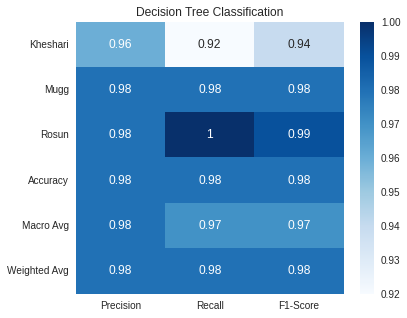

In [ ]:
conmat=[[0.96,0.92,0.94],[0.98,0.98,0.98],[0.98,1,0.99],[0.98,0.98,0.98],[.98,0.97,0.97],[.98,0.98,0.98]]
fig, px=plt.subplots(figsize=(6,5))
heatmap(conmat , cmap="Blues", xticklabels=['Precision','Recall','F1-Score'],yticklabels=['Kheshari','Mugg','Rosun','Accuracy','Macro Avg', 'Weighted Avg'],annot=True,fmt='g')
plt.title('Decision Tree Classification', y=1.1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9808612440191388


In [ ]:
#Naive Bayes 
naive_bayes = GaussianNB()  
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test) 

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 25,   1,   0],
       [ 18, 107,   1],
       [  0,   4,  53]])

Text(0.5, 24.0, 'Predicted label')

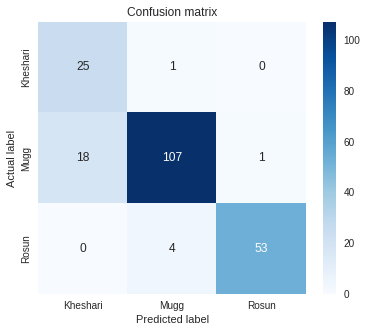

In [ ]:
fig, px=plt.subplots(figsize=(6,5))
heatmap(cnf_matrix , cmap="Blues", xticklabels=['Kheshari','Mugg','Rosun'],yticklabels=['Kheshari','Mugg','Rosun'],annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ROC AUC score: 0.9292314675311287


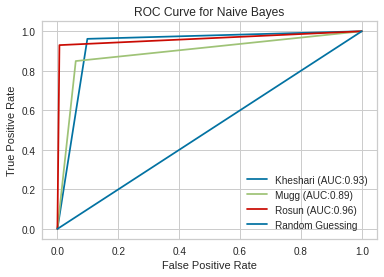

In [ ]:
target= ['Kheshari','Mugg','Rosun']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (6, 4))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
c_ax.set_title('ROC Curve for Naive Bayes', size=12)
plt.show()
#naive_bayes

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Kheshari       0.58      0.96      0.72        26
        Mugg       0.96      0.85      0.90       126
       Rosun       0.98      0.93      0.95        57

    accuracy                           0.89       209
   macro avg       0.84      0.91      0.86       209
weighted avg       0.92      0.89      0.89       209



Text(0.5, 1.1, 'Naive Bayes Classification')

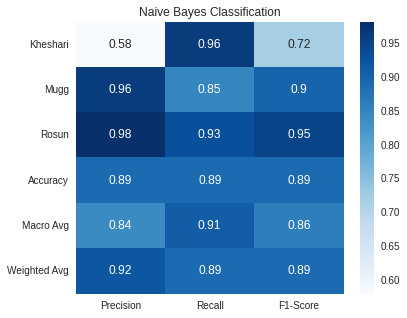

In [ ]:
conmat=[[0.58,0.96,0.72],[0.96,0.85,0.90],[0.98,0.93,0.95],[0.89,0.89,0.89],[.84,0.91,0.86],[.92,0.89,0.89]]
fig, px=plt.subplots(figsize=(6,5))
heatmap(conmat , cmap="Blues", xticklabels=['Precision','Recall','F1-Score'],yticklabels=['Kheshari','Mugg','Rosun','Accuracy','Macro Avg', 'Weighted Avg'],annot=True,fmt='g')
plt.title('Naive Bayes Classification', y=1.1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8851674641148325


In [ ]:
 
# Making the final model using voting classifier
estimators=[('ranfor', ran_for), ('dectree', dec_tree), ('naivebayes', naive_bayes)]
final_model = VotingClassifier(estimators, voting='soft')
 
# training all the model on the train dataset
final_model.fit(X_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, pred_final)
cnf_matrix

array([[ 25,   1,   0],
       [  1, 125,   0],
       [  0,   0,  57]])

Text(0.5, 24.0, 'Predicted label')

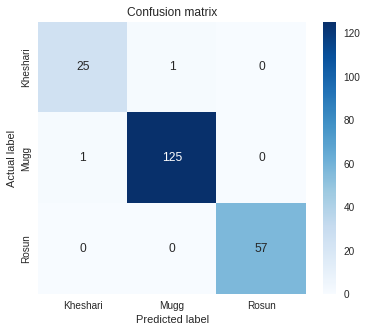

In [ ]:
fig, px=plt.subplots(figsize=(6,5))
heatmap(cnf_matrix , cmap="Blues", xticklabels=['Kheshari','Mugg','Rosun'],yticklabels=['Kheshari','Mugg','Rosun'],annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#ensemble(all three)

ROC AUC score: 0.989348213326092


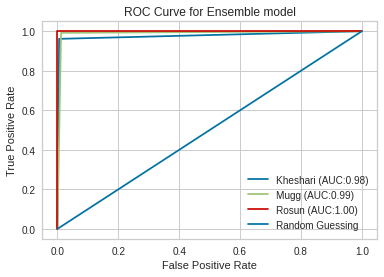

In [ ]:
target= ['Kheshari','Mugg','Rosun']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (6, 4))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, pred_final))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
c_ax.set_title('ROC Curve for Ensemble model', size=12)
plt.show()
#ensemble(all three)

In [ ]:
print(classification_report(y_test, pred_final))

              precision    recall  f1-score   support

    Kheshari       0.96      0.96      0.96        26
        Mugg       0.99      0.99      0.99       126
       Rosun       1.00      1.00      1.00        57

    accuracy                           0.99       209
   macro avg       0.98      0.98      0.98       209
weighted avg       0.99      0.99      0.99       209



Text(0.5, 1.1, 'Ensemble model(All three)')

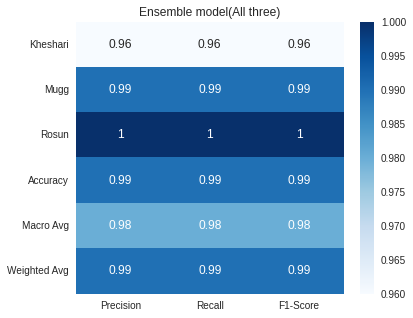

In [ ]:
conmat=[[0.96,0.96,0.96],[0.99,0.99,0.99],[1,1,1],[0.99,0.99,0.99],[.98,0.98,0.98],[.99,0.99,0.99]]
fig, px=plt.subplots(figsize=(6,5))
heatmap(conmat , cmap="Blues", xticklabels=['Precision','Recall','F1-Score'],yticklabels=['Kheshari','Mugg','Rosun','Accuracy','Macro Avg', 'Weighted Avg'],annot=True,fmt='g')
plt.title('Ensemble model(All three)', y=1.1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_final))

Accuracy: 0.9904306220095693


In [ ]:
import lime
from lime import lime_tabular
from lime import lime_text
from sklearn.pipeline import make_pipeline

In [ ]:
c = make_pipeline(vectorizer, nb)
print(c.predict_proba([newsgroups_test.data[0]]).round(3))

In [ ]:
predict = lambda x: final_model.predict_proba(x).astype(float)
X = X_test.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_test.columns,kernel_width=5)

AttributeError: ignored

In [ ]:
# Choose the 5th instance and use it to predict the results
j = 5
exp = explainer.explain_instance(X_test.values[j],predict, num_features=6)

# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
_ = exp.as_pyplot_figure()

In [ ]:
# creating the dataset
data = {'Random Forest':97.5, 'Decision Tree':98, 'Naive Bayes':88.5,
        'Ensemble(All three)':99}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Accuracy Graph of the algorithms")
plt.show()

In [ ]:
# creating the dataset
data = {'Rosun':218, 'Mugg':634, 'Kheshari':189}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Ratio of labelled crops in the dataset")
plt.show()